## Setup

First we need to load all the functions and data types that make up the model:

In [1]:
cd(dirname(pwd()))
include("Code\\new model v9.jl");

Plausibility check ok? true
Plausibility check ok? true
Plausibility check ok? true
Plausibility check ok? true
Plausibility check ok? true
Plausibility check ok? true


## Introduction

The two central functions in the model are the *timecourse()* and *the plot_run_comprehensive()* functions.

*timecourse(t, genotype_vector...)* allows you to simulate timecourses for a provided number of generations t.

*plot_run_comprehensive(run...)* then allows you to plot the results of the simulation.

However, to be able to run a simulation we need to first do 2 other things.

1. We need to define which parameters should be used for simulation. This is done with the *apply_parameters_set()* function.
2. We need to define which kind of population shall be simulated. This is the "genotype_vector" that needs to be provided to the *timecourse()* function for simulation.

Only then we can

3. Simulate a timecourse *timecourse()*
4. Show the results using *the plot_run_comprehensive()*

## 1. Defining parameter values

Parameters are saved in the form of a dictionary (for more information see the Julia Documentation: https://docs.julialang.org/en/v1/base/collections/#Base.Dict) where every parameter has a name and an assigned value.

To make it easier, we pre-defined a few standard parameter sets. For example, under the name *Parameters_set_standard*.

It looks like this:

In [2]:
Parameters_set_standard

Dict{String, BigFloat} with 22 entries:
  "s_f"   => 1.0
  "s_m"   => 0.0
  "c"     => 1.0
  "Rm"    => 6.0
  "h_e"   => 1.0
  "m_1"   => 0.0
  "m_2"   => 0.0
  "r"     => 0.5
  "h_f"   => 1.0
  "s_e"   => 0.0
  "e_h"   => 0.953
  "s_c"   => 0.0
  "e_s"   => 0.947368
  "theta" => 0.1
  "h_e2"  => 1.0
  "s_a"   => 0.0
  "e_e"   => 0.95
  "er_1"  => 0.0
  "s_d"   => 0.0
  "s_b"   => 0.0
  "er_2"  => 0.0
  "er_3"  => 0.0

In order to make the system now use a certain set of Parameters, we need to provide it to the *apply_parameters_set()* function, which works like this:

In [3]:
apply_parameters_set(Parameters_set_standard)

Dict{String, Matrix} with 7 entries:
  "selection_matrix"     => BigFloat[1.0; 1.0; … ; 1.0; 1.0;;]
  "homing_matrix"        => Any[1.0 0.0 … 0.0 0.0; 0.0 1.0 … 0.0 0.0; … ; 0.0 0…
  "mutation_matrix"      => Any[1.0 0.0 … 0.0 0.0; 0.0 1.0 … 0.0 0.0; … ; 0.0 0…
  "egg_matrix"           => Any[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0…
  "recombination_matrix" => Any[1.0 0.0 … 0.0 0.0; 0.0 1.0 … 0.0 0.0; … ; 0.0 0…
  "sperm_matrix"         => Any[0.5 0.0 … 0.0 0.0; 0.475 0.475 … 0.0 0.0; … ; 0…
  "editing_matrix"       => Any[1.0 0.0 … 0.0 0.0; 0.0 1.0 … 0.0 0.0; … ; 0.0 0…

I will not elaborate too much what this means practically speaking, but as you can see these parameter values are then used to calculate different matrices describing processes like selection, homing etc. Which is why the application of new parameters returns a dictionary of 7 matrices.

## 2. Defining a population

The simulation of time courses is only possible if the algorithm knows what population it is supposed to simulate.

A new population can be generated by calling the *generate_population()* function:

In [4]:
new_population = generate_population()

1071-element Vector{BigFloat}:
 1.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

A population is nothing but a vector in which every entry represents the frequency of a specific genotype, but more on technicalities like this in the Modelling fundamentals notebook.

By default  *generate_population()* returns a normal, fully wild-type population. But it is also possible to generate a population in which the different types of target site resistance exist by providing it arguments for r1, r2 or r3:

In [5]:
new_population = generate_population(r2 = 0.001, r3 = 0.001);

Finally, without the release of transgenic elements there is not going to be too much going on in our simulation. So we need to define what type of release we want to simulate. This can be done by changing initial frequency of specific genotypes at generation 0 in the population genotype vector:

In [6]:
new_population[return_i(["AB" "ef" "CD" "cd"], genotypes_detailed)] = BigFloat("0.001");

More details on the nomencleature of genotypes in the "Modelling fundamentals" notebook. Just shortly: captial AB represents a functional YLE, and capital "CD" is a functional ASD. So with the above line of code we assume a 0.1% heterozygous release of YLE+ASD.

Similar to the parameter sets, we have already pre-defined a standard population vector for this that can be called as *genotype_standard*:

In [7]:
genotype_standard

1071-element Vector{BigFloat}:
 1.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

## 3. Simulating time courses

Now that we have defined the parameter values and what population/release we want to simulate, we can execute the *timecourse()* function:

In [8]:
new_timecourse = timecourse(150, new_population)

Dict{String, Matrix{BigFloat}} with 5 entries:
  "genotypes" => [0.997003 0.996007 … 1.02069e-161 6.71645e-163; 0.0 0.0 … 7.75…
  "wildtype"  => [0.997003 0.996007 … 1.02069e-161 6.71645e-163; 0.0 0.0 … 7.75…
  "eggs"      => [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; …
  "zygotes"   => [0.0 59.7604 … 1.02069e-160 6.71645e-162; 0.0 0.0 … 7.75079e-1…
  "sperm"     => [0.0 0.499001 … 6.49971e-31 3.91541e-31; 0.0 0.0 … 0.000851305…

The resulting function gives us a simulation object which contains different matrices that describe the frequency of genotypes throughout simulation. However, these numbers are not easy to interpret, so we need to plot the results.

## 4. Plotting

To now see what was happened in our simulation, we can plot results using the *plot_run_comprehensive()* function which we need to provide the simulation object we generated before (which we called "new_timecourse"). Further, we can define what lines we would like to be shown in our plot.

The most relevant ones are

- the number of total females (called with "allfemales_bool") which is activated by default
- the frequency of functional YLE (called with "yle_total_bool = true")
- the frequency of functional ASD (called with "shredder_total_male_bool = true")

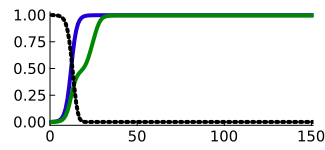

In [9]:
newfig1b = plot_run_comprehensive(new_timecourse, yle_total_bool = true, shredder_total_male_bool = true,  given_dpi = 300, given_size = (325,150),)
plot!(legend=false, ytickfontsize = 10, xtickfontsize = 10)

newfig1b

However, there are many more options for plotting (like the sexratio, load, frequency of resistance, frequency of defectives and more). To learn about this, have a look at the model code itself. A typical set up with relevant lines could for example look like this:

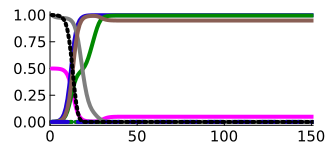

In [10]:
newfig1b = plot_run_comprehensive(new_timecourse, yle_total_bool = true, shredder_total_male_bool = true, correlation_bool = true,
            given_dpi = 300, given_size = (325,150), dCas9_bool = true, dgRNA1_bool = true, dgRNA2_bool = true, 
            dshredder_bool = true, sexratio_bool = true, load_zygotes_bool2 = true)
plot!(legend=false, ytickfontsize = 10, xtickfontsize = 10)

newfig1b

## Summary

These 4 main steps (parameter setting, population creation, time course simulation and plotting) are the main steps for using the model. There are a few more advanced functionalities for example for sensitivity analysis but these go beyond an introduction. Feel free to explore the model code to learn more about those.